In [52]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches

In [53]:
def pulse_y(N=1000,A=1,cycles=20):
    return np.array([np.sin(2*np.pi*i*cycles/(N-1)) for i in range(N)])
def pulse_x(t,tx,rtt,N=1000):
    xo = float(2*t/rtt)
    xe = float(xo + 2*tx/rtt)
    return np.array([x if x<1 else 2-x for x in np.arange(xo,xe,(xe-xo)/N)], dtype=float)

<ipython-input-97-3769ad465033>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,ax = plt.subplots(figsize=(15,4))


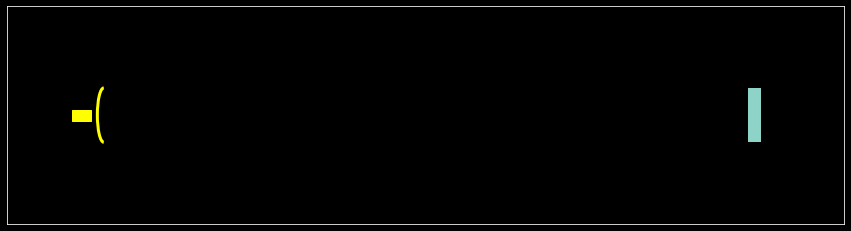

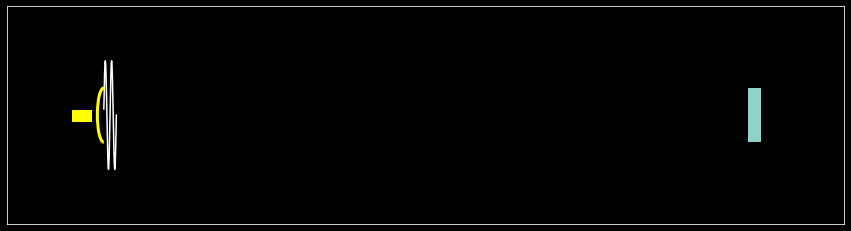

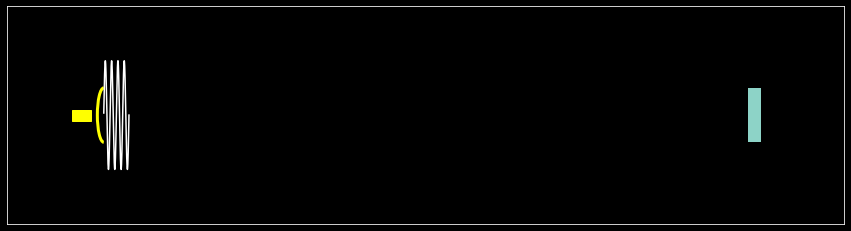

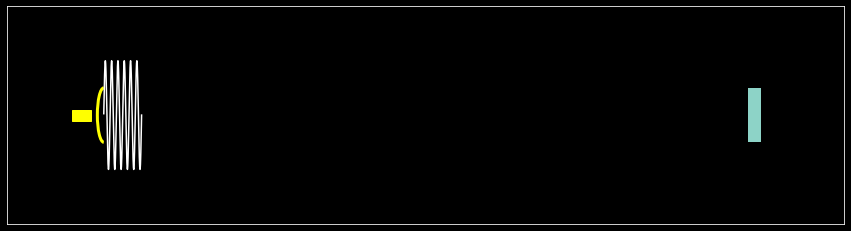

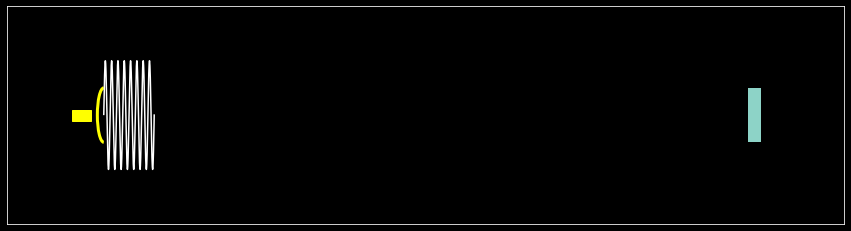

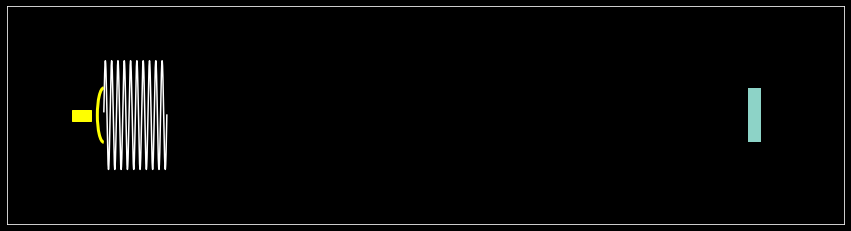

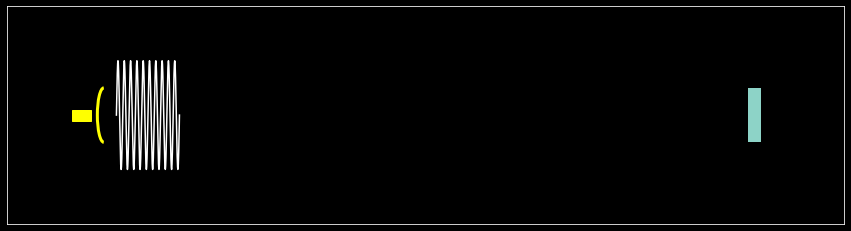

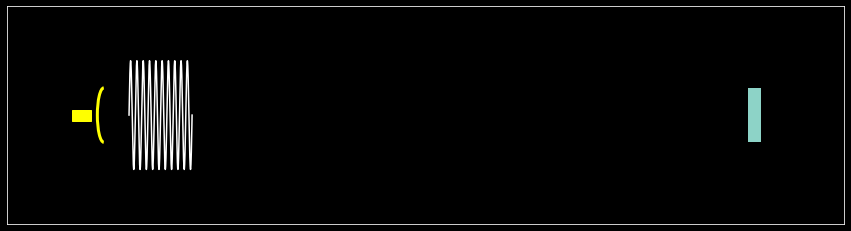

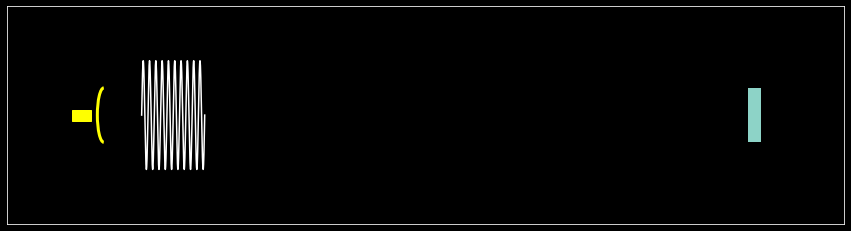

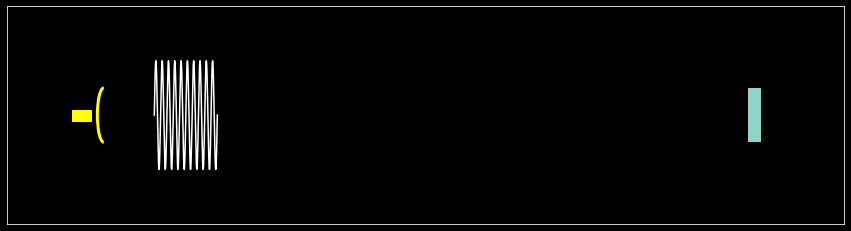

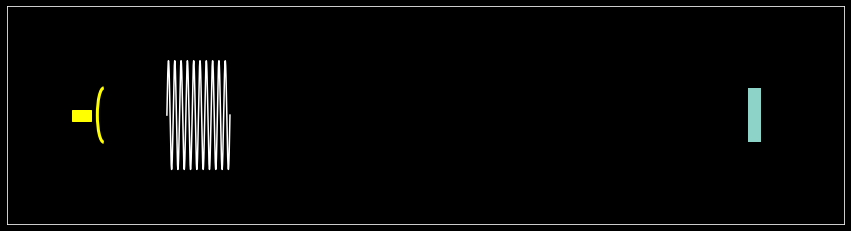

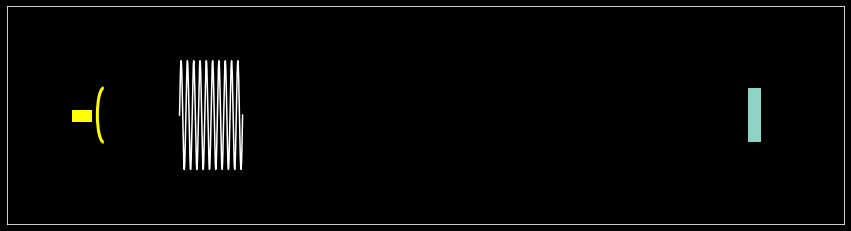

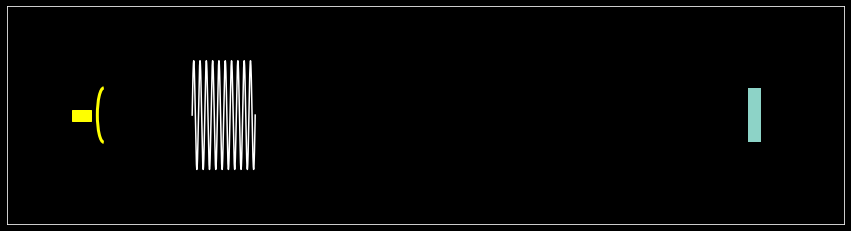

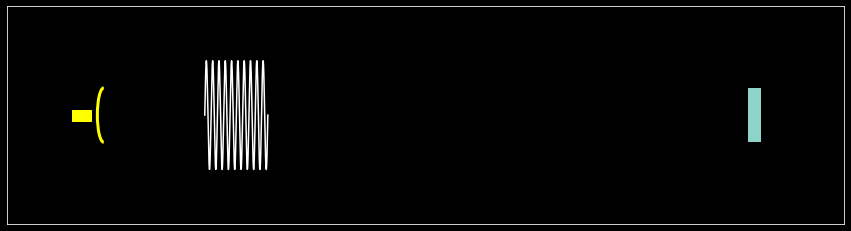

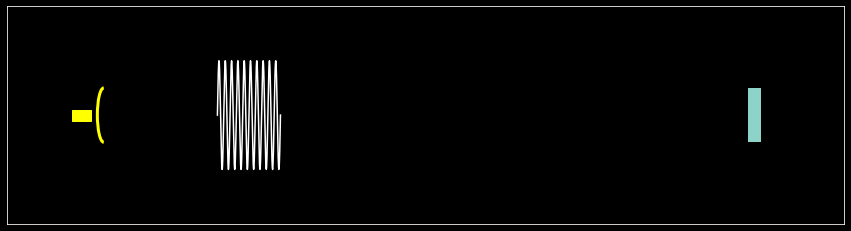

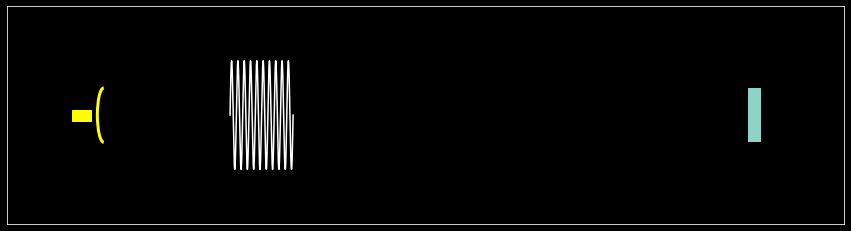

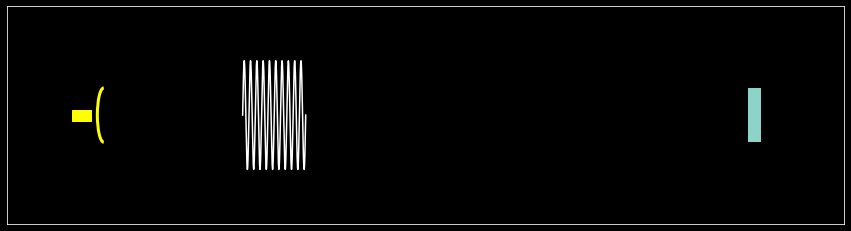

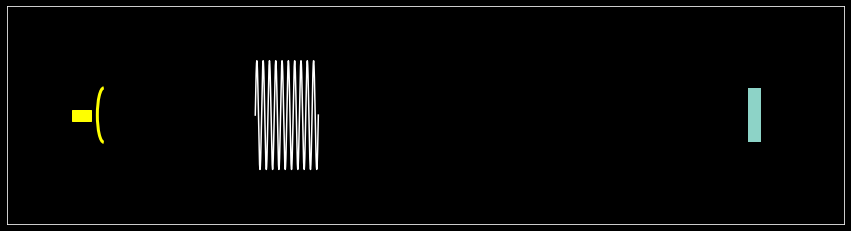

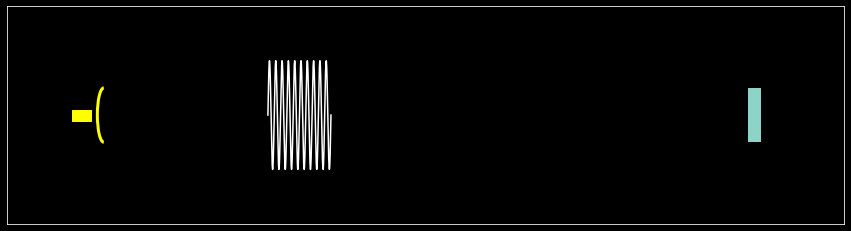

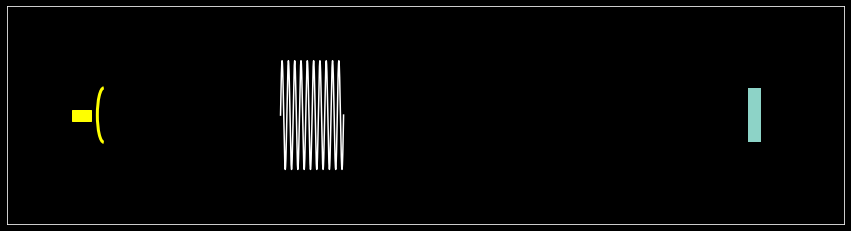

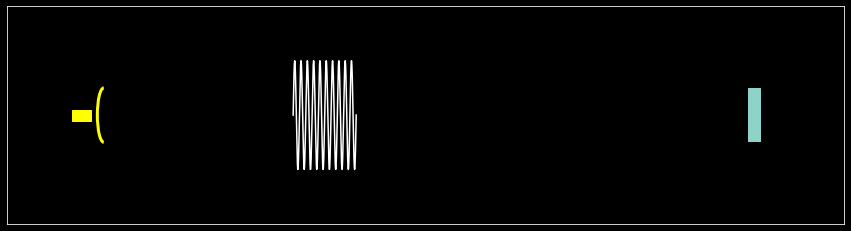

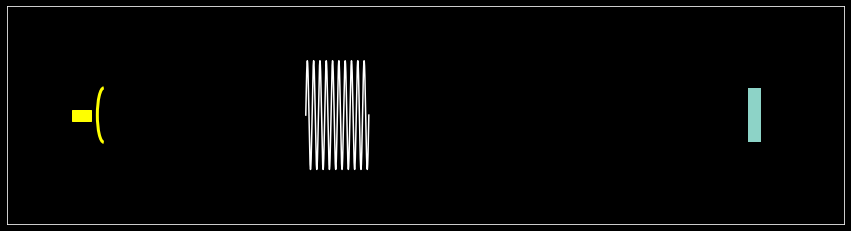

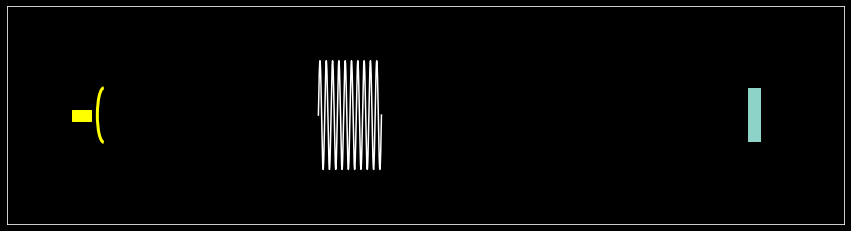

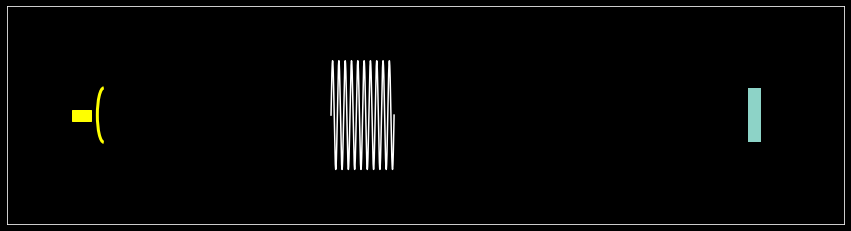

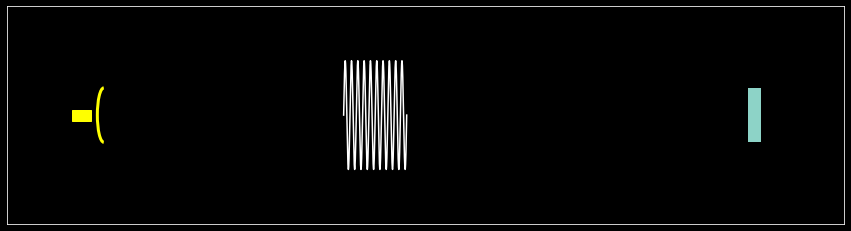

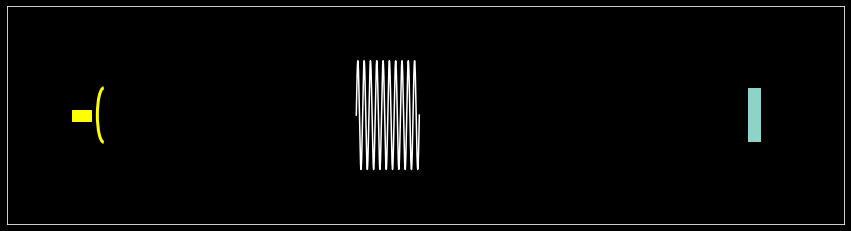

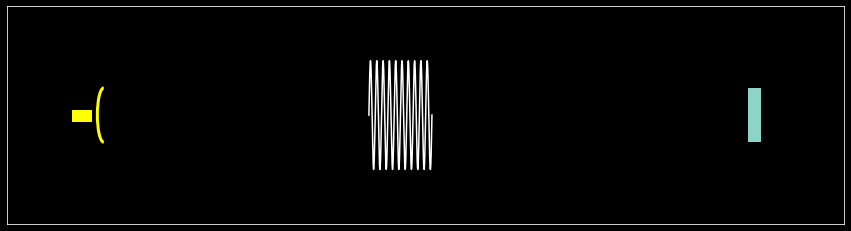

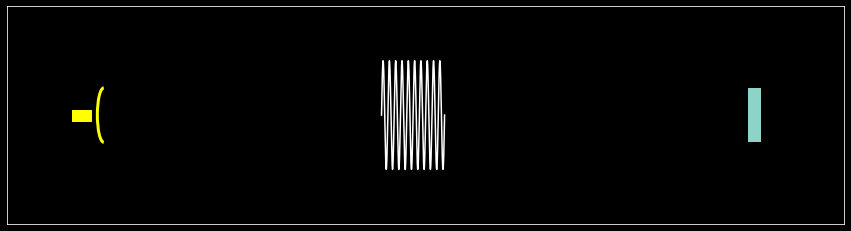

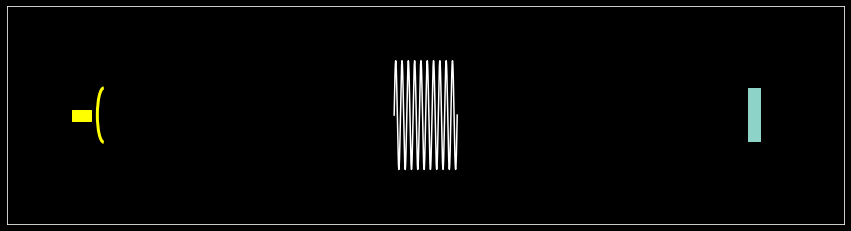

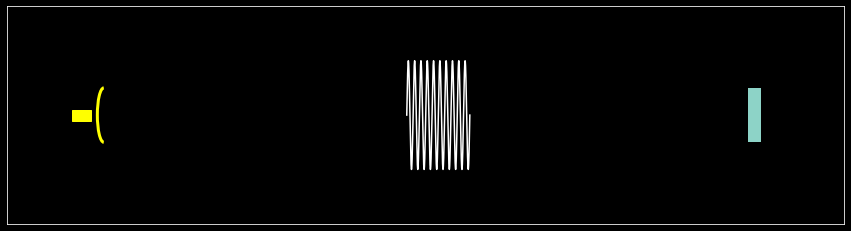

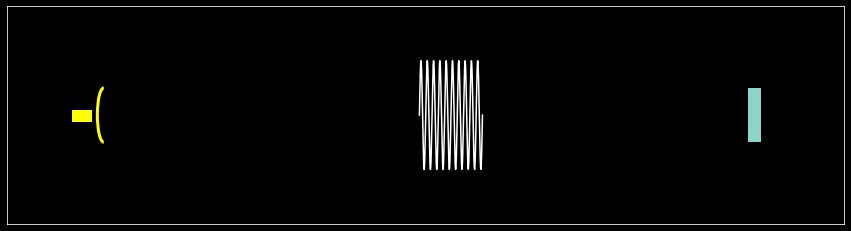

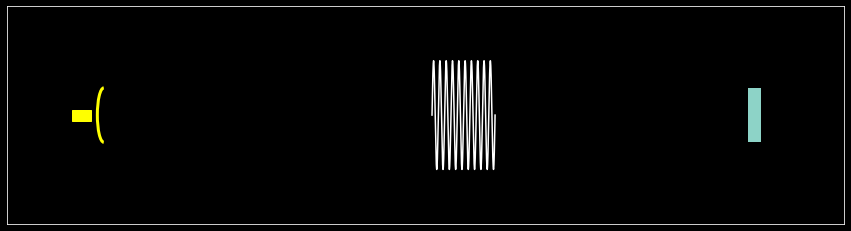

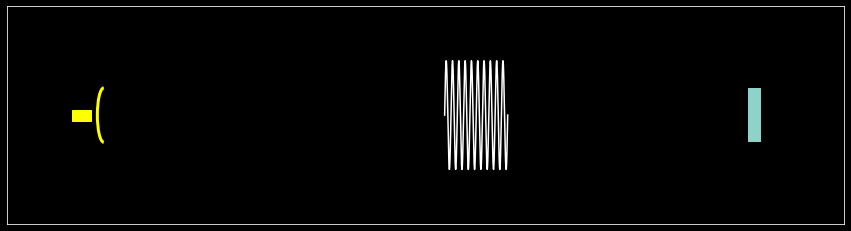

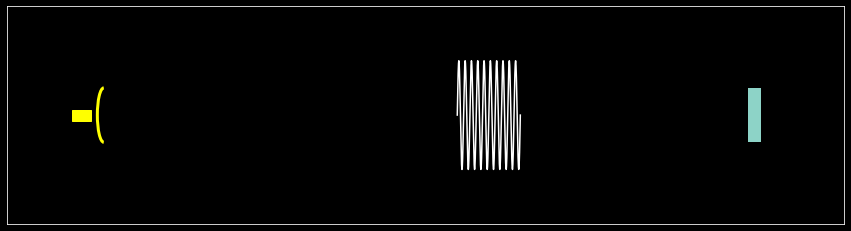

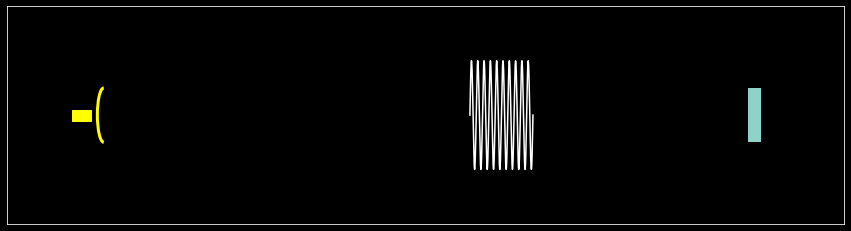

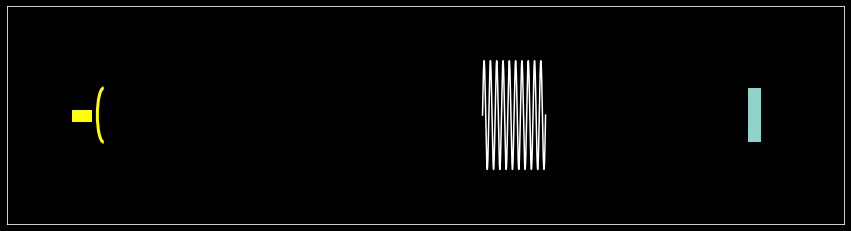

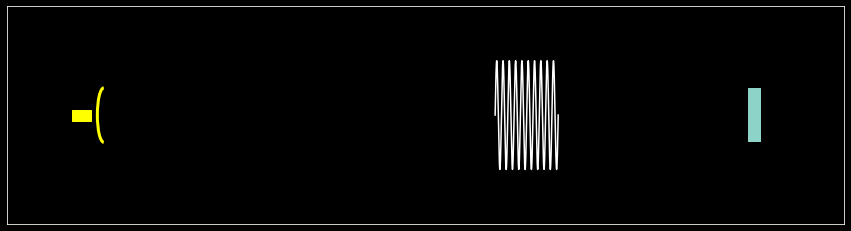

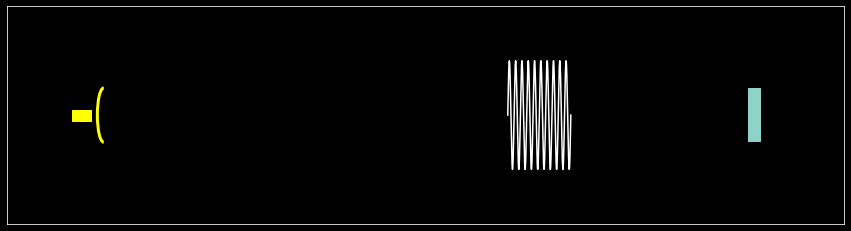

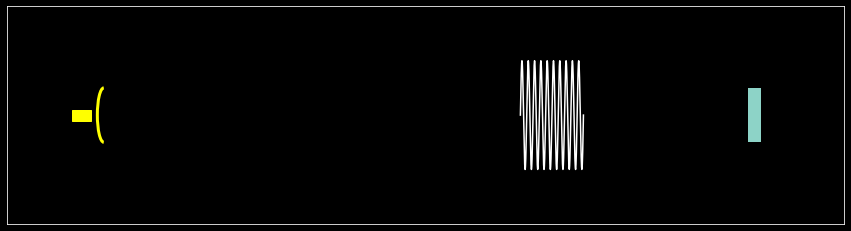

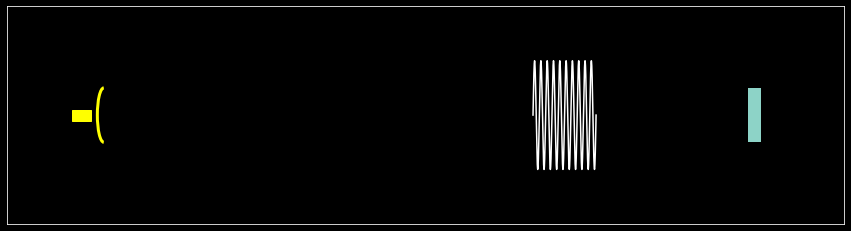

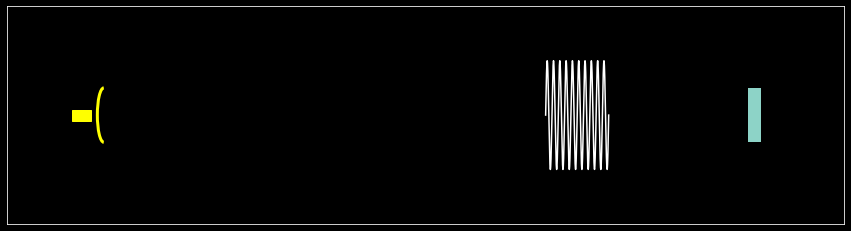

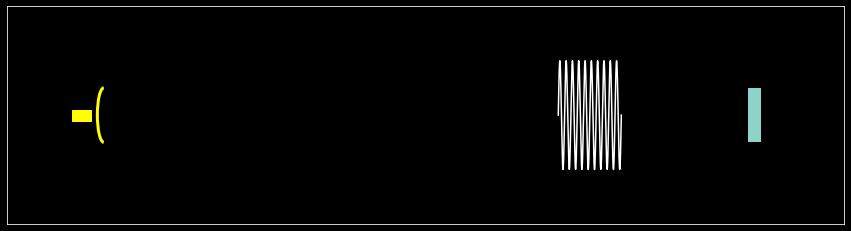

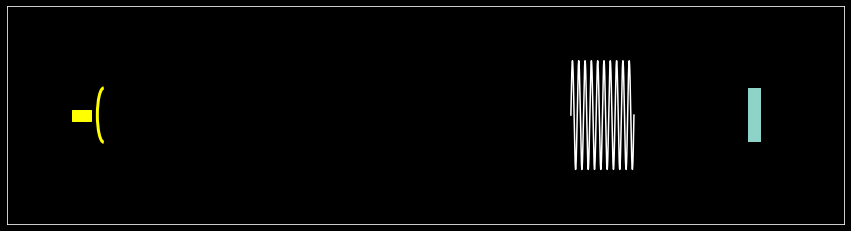

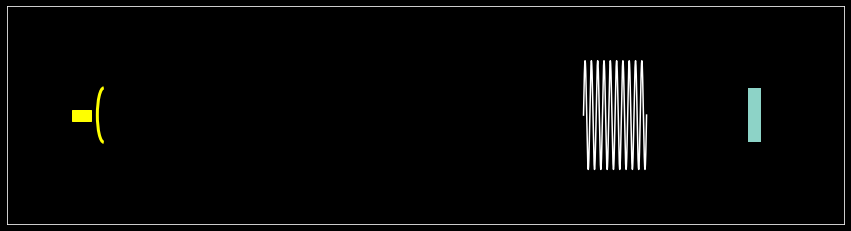

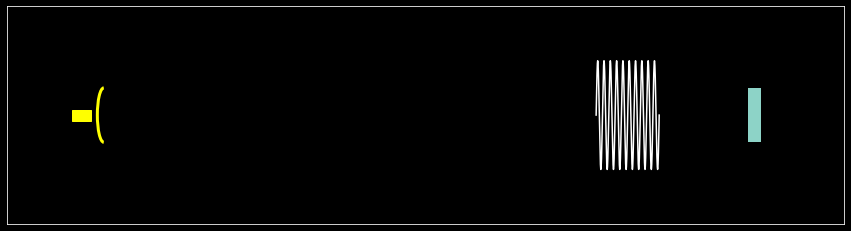

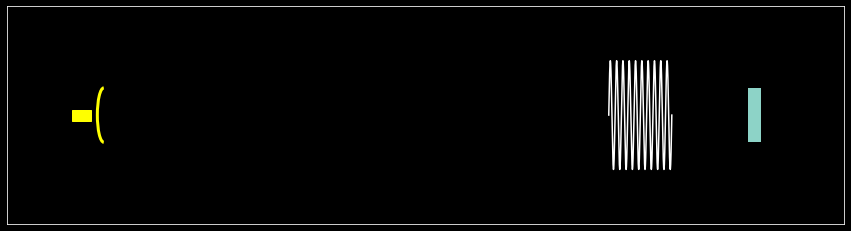

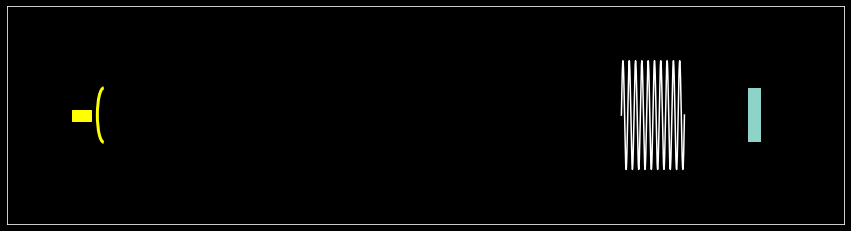

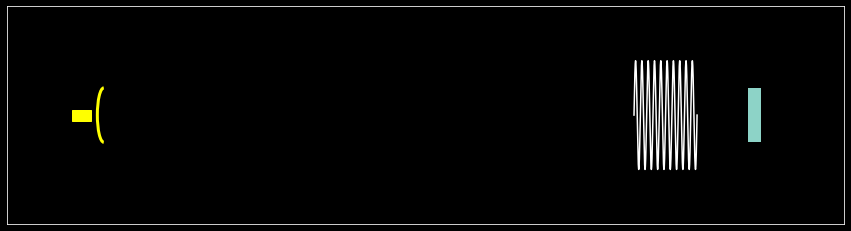

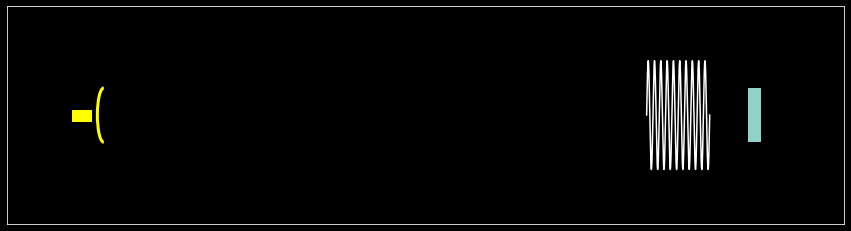

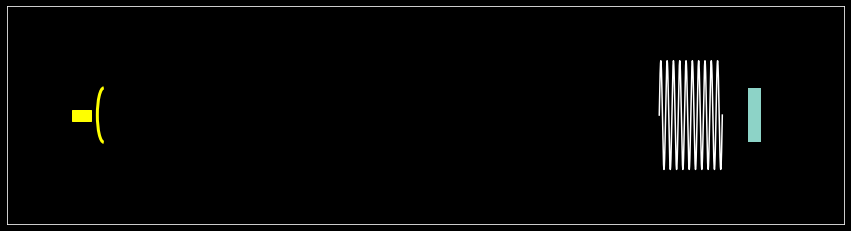

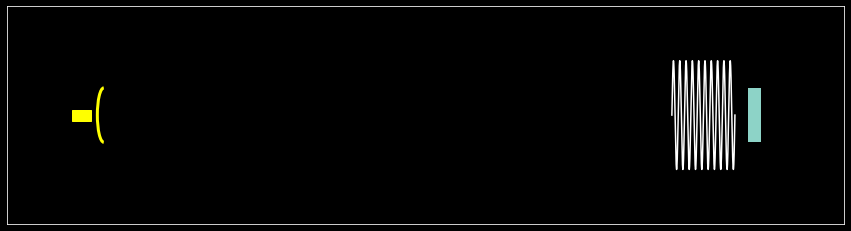

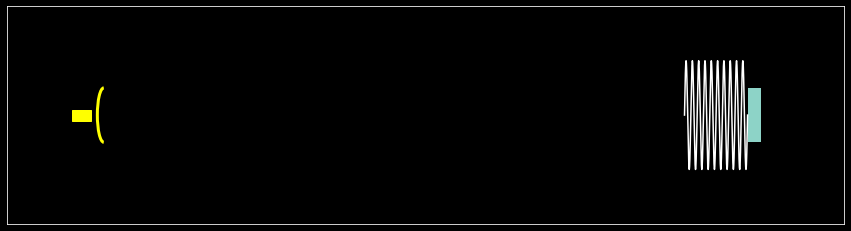

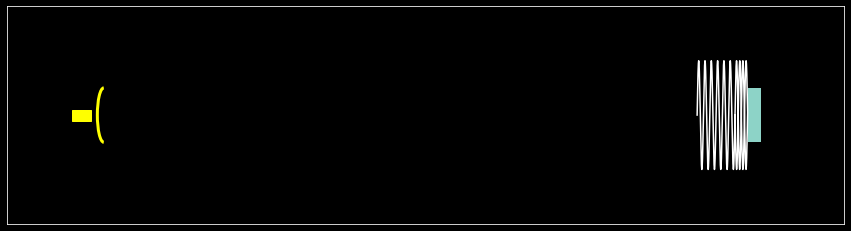

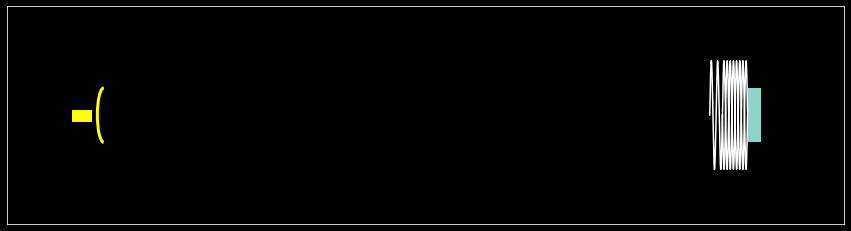

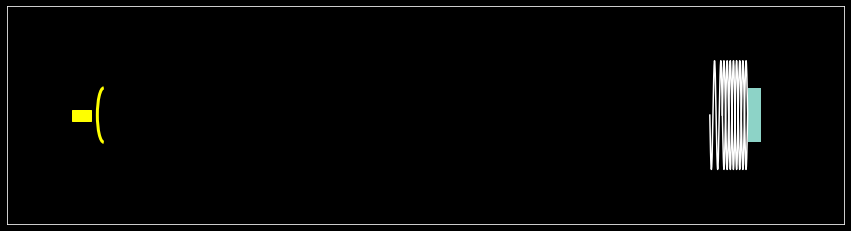

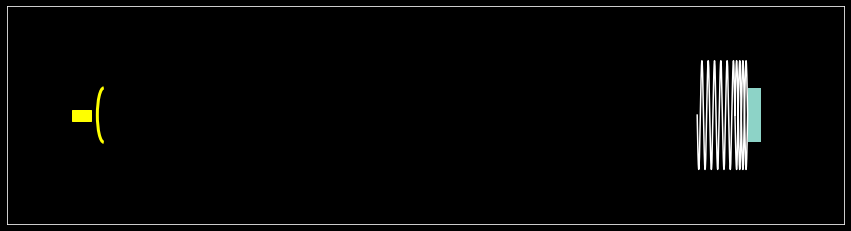

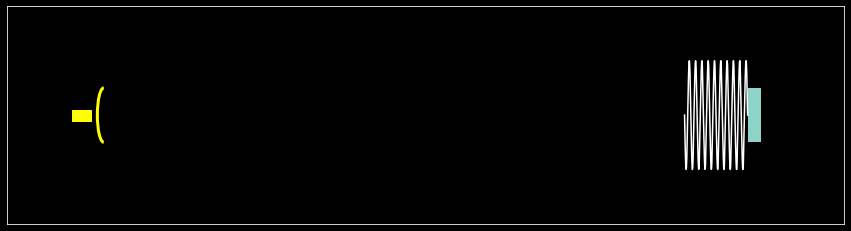

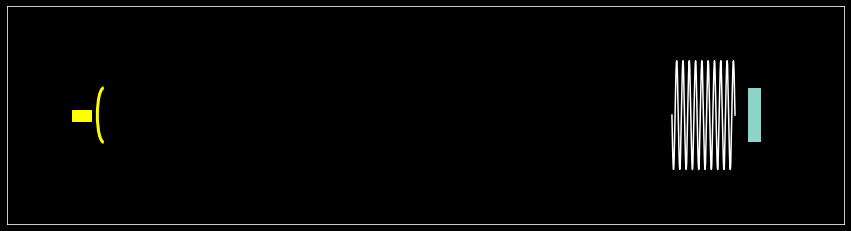

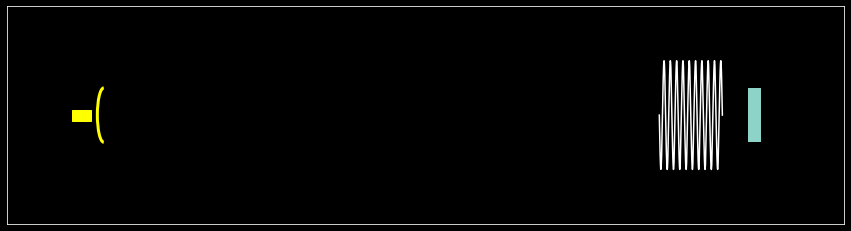

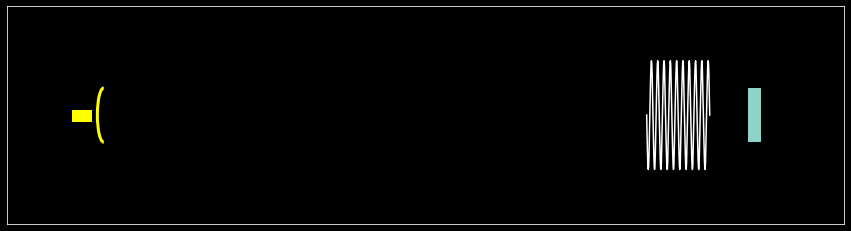

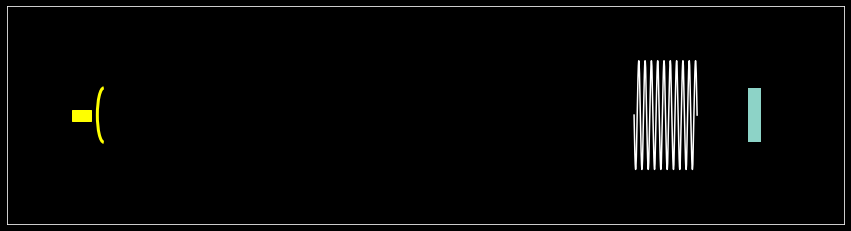

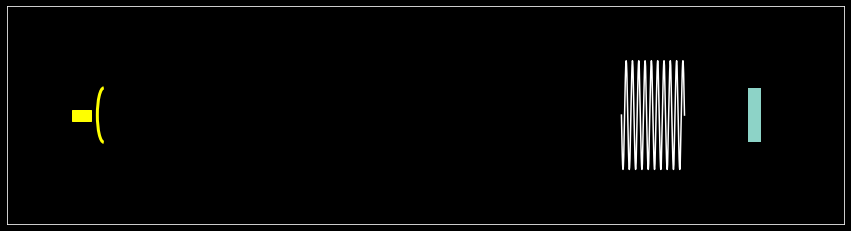

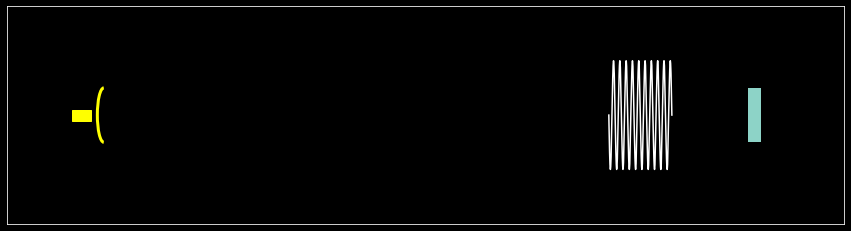

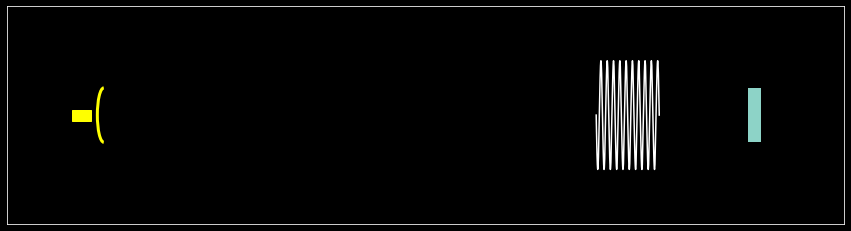

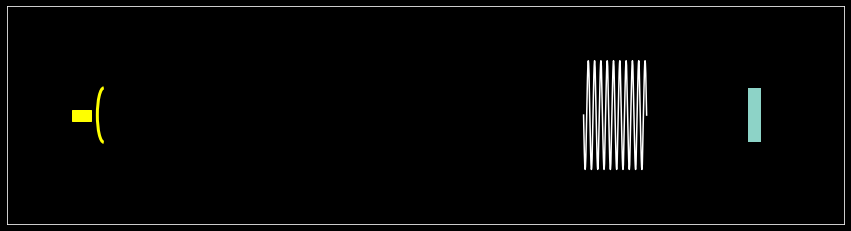

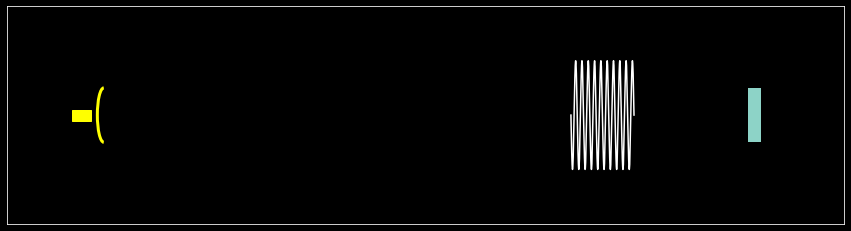

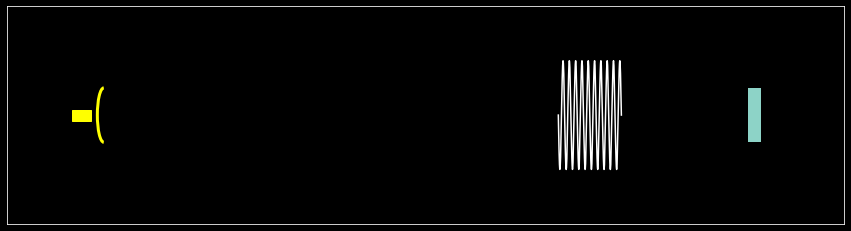

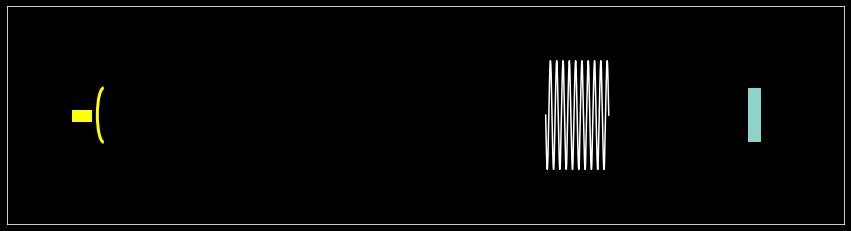

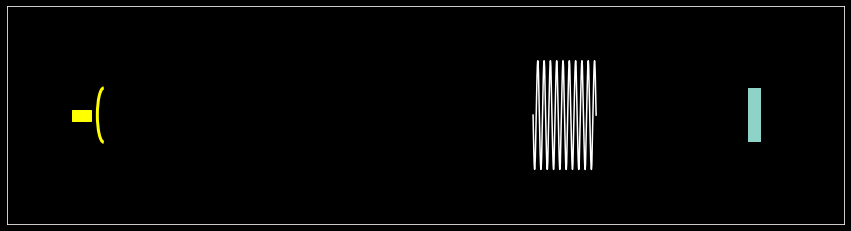

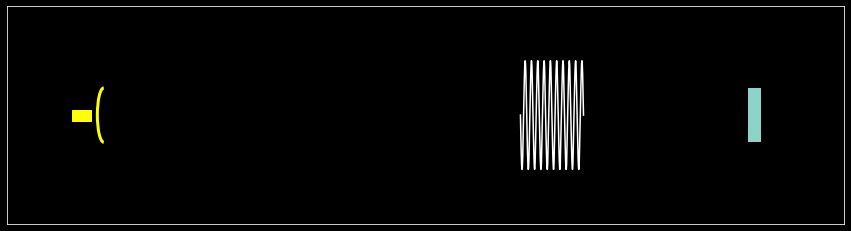

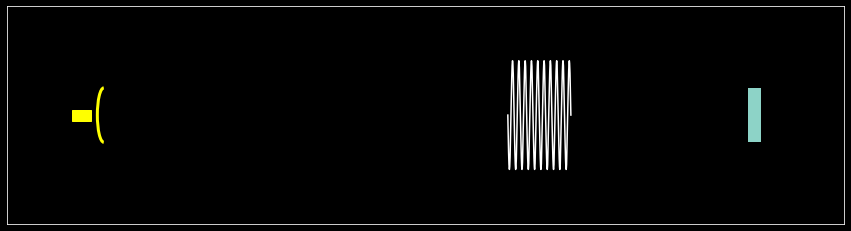

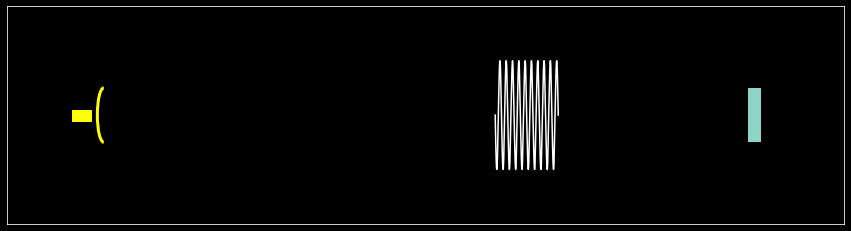

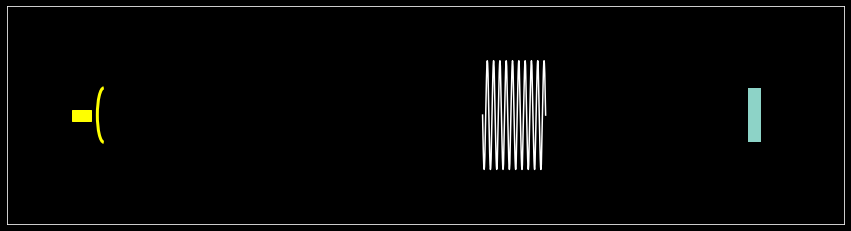

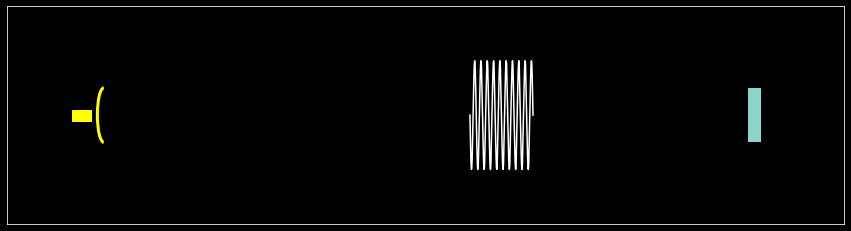

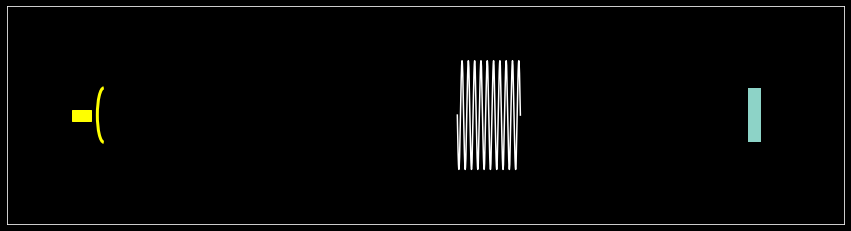

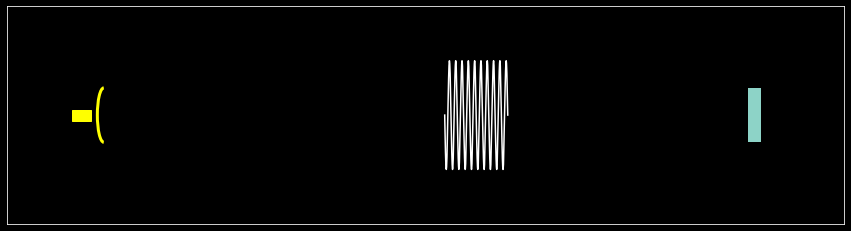

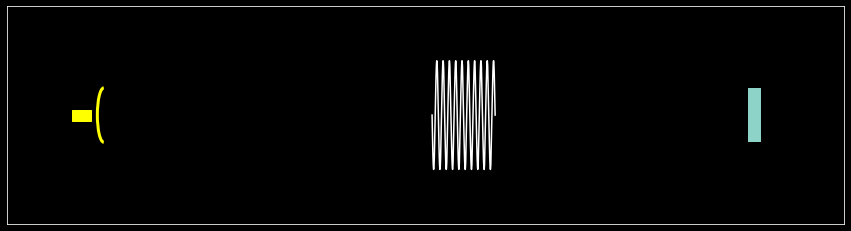

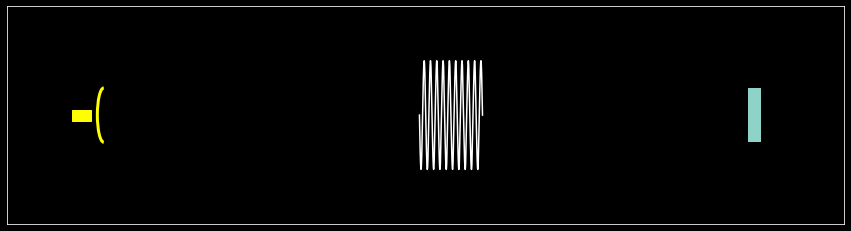

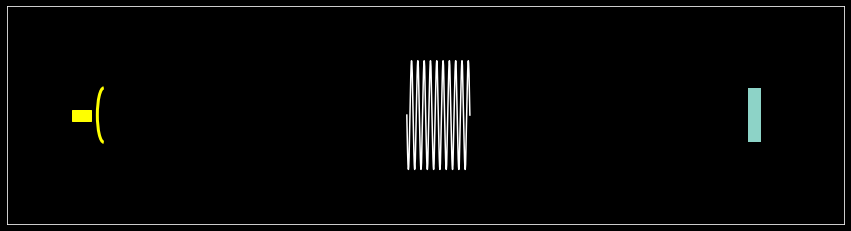

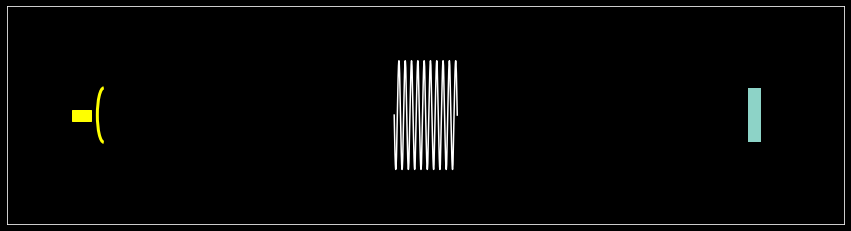

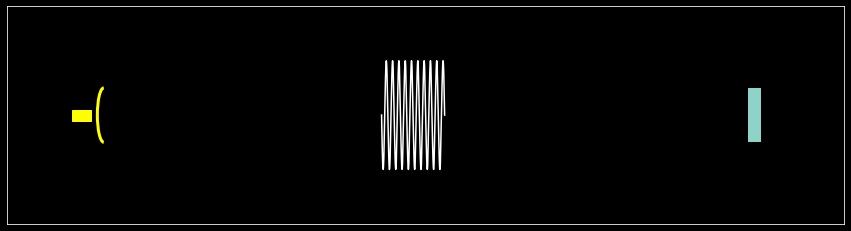

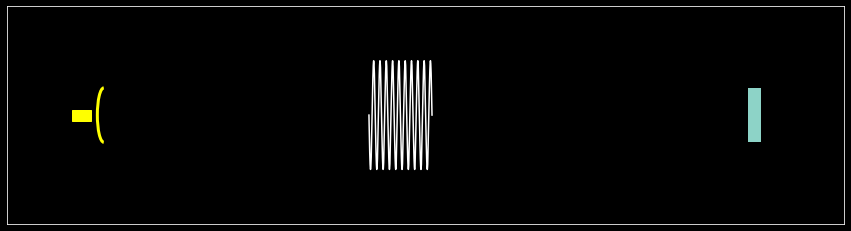

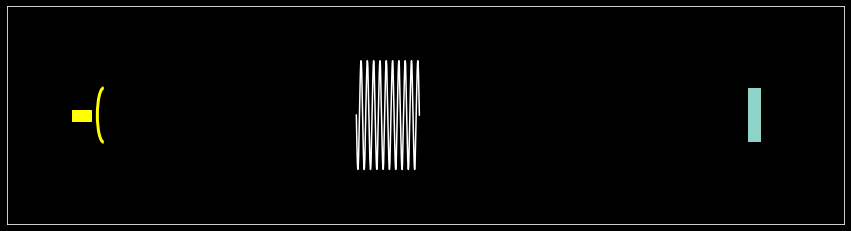

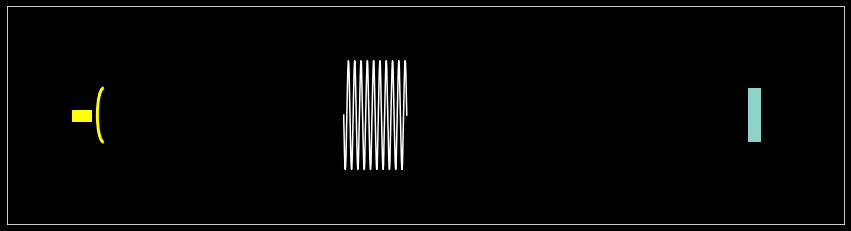

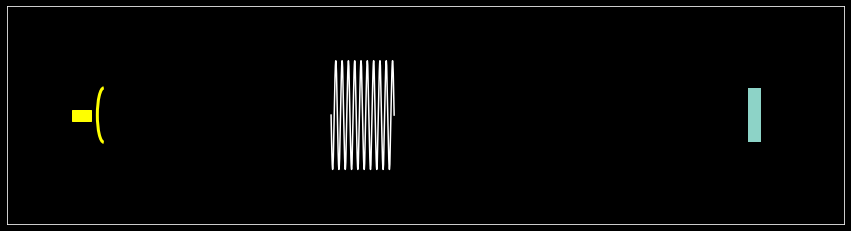

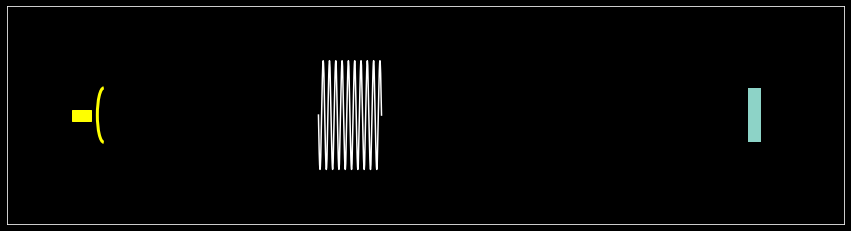

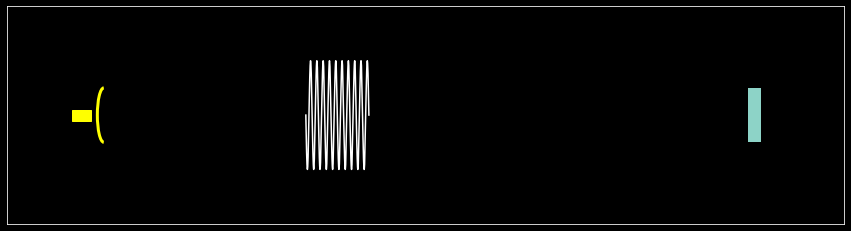

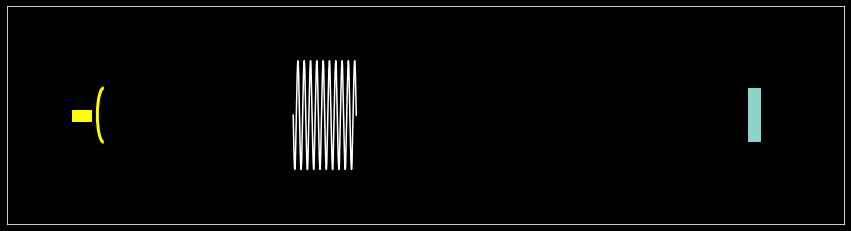

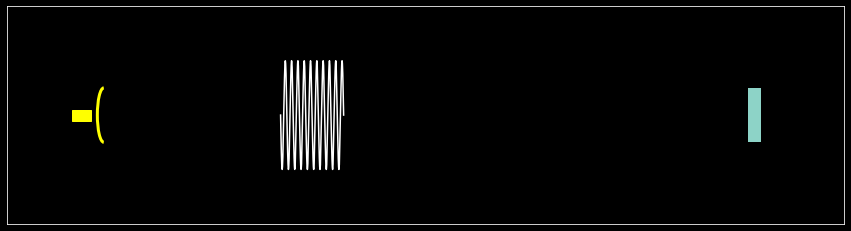

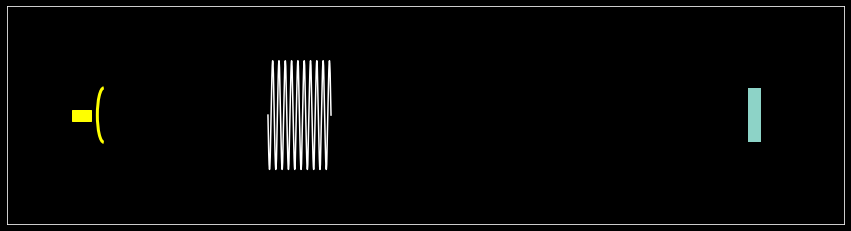

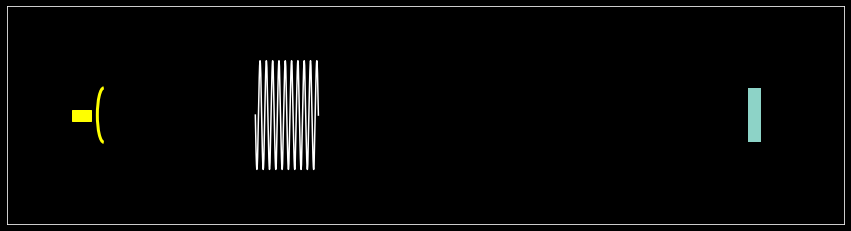

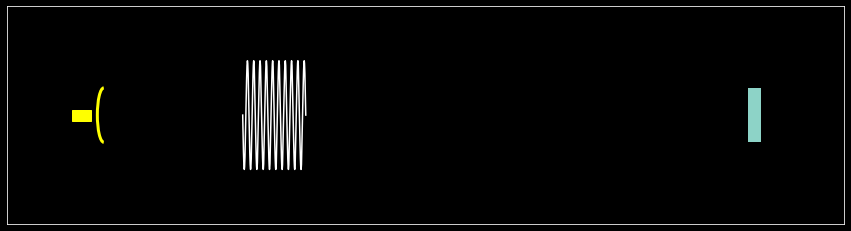

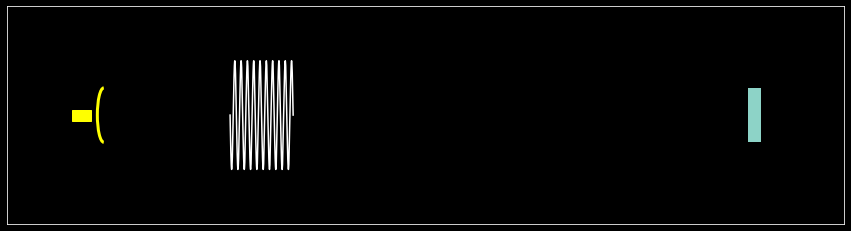

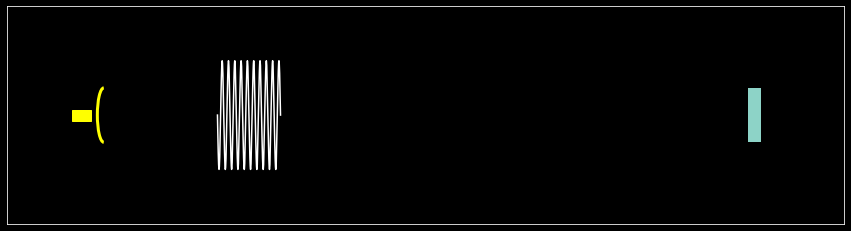

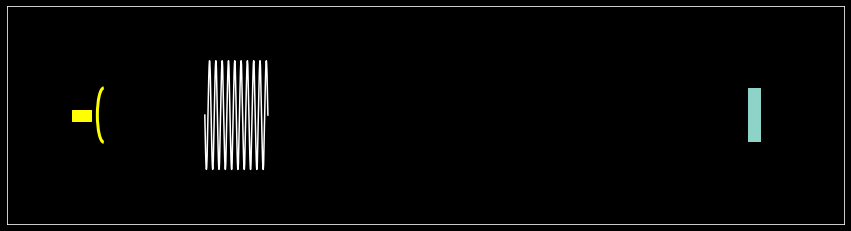

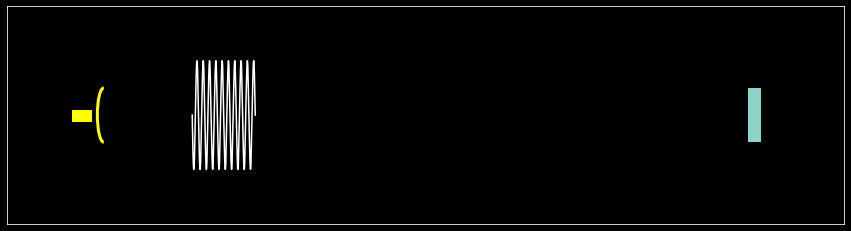

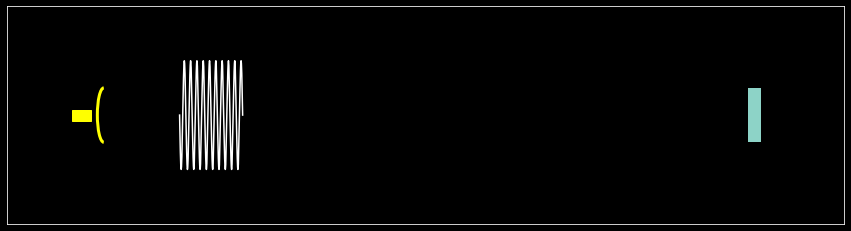

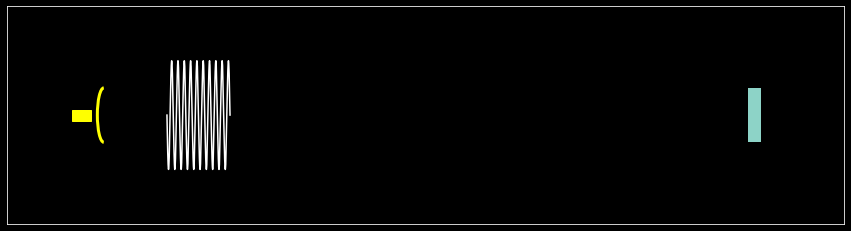

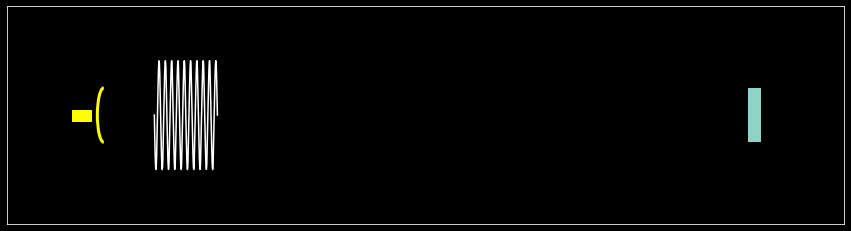

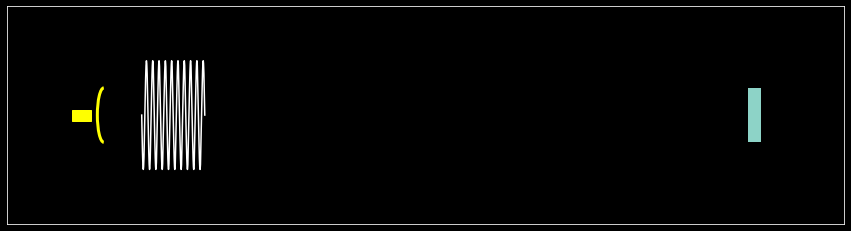

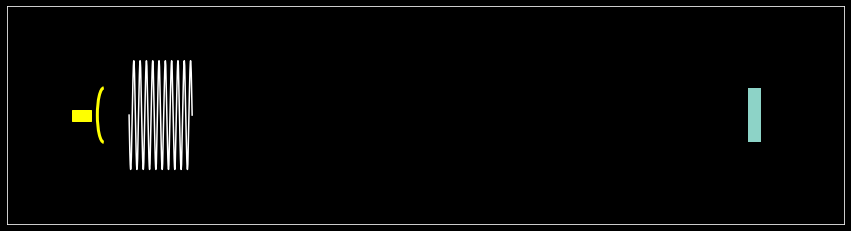

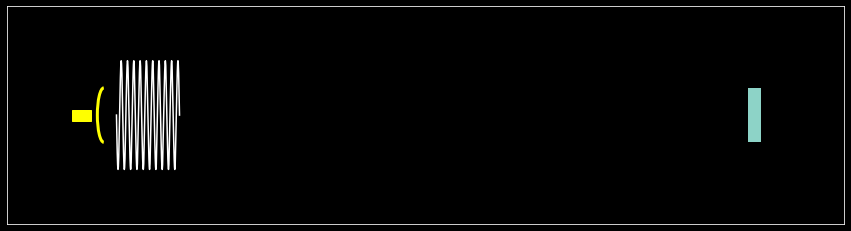

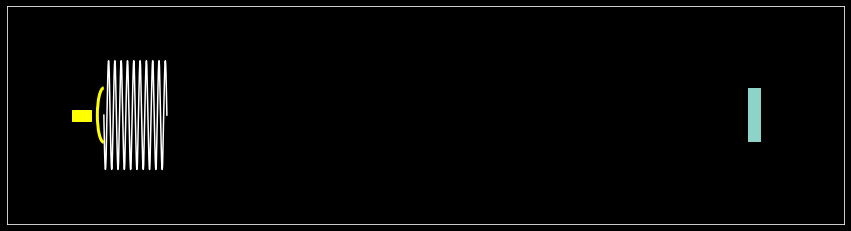

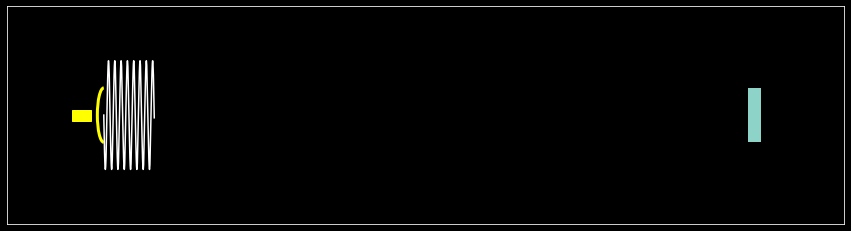

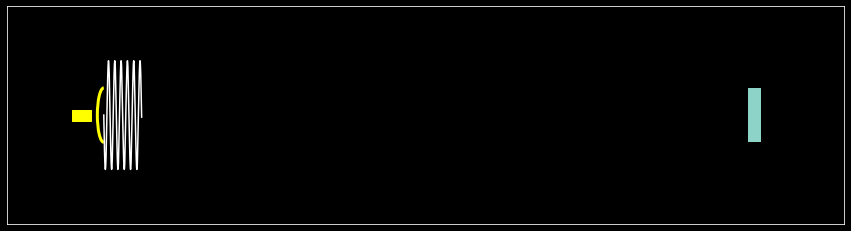

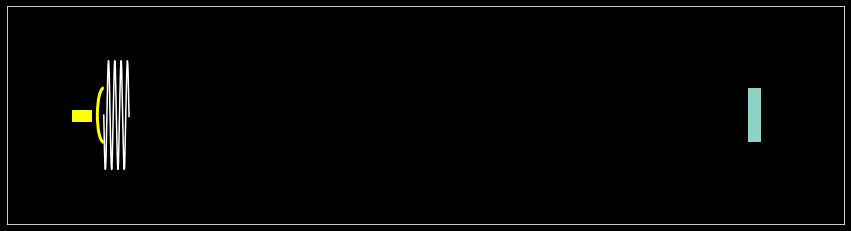

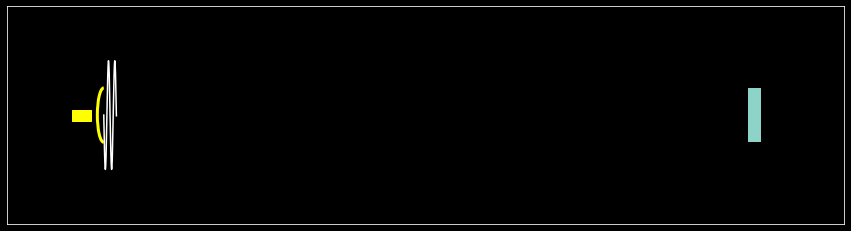

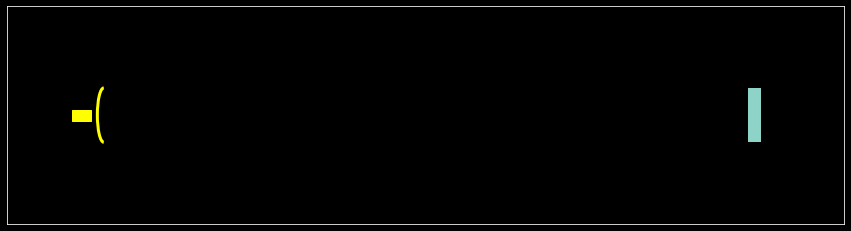

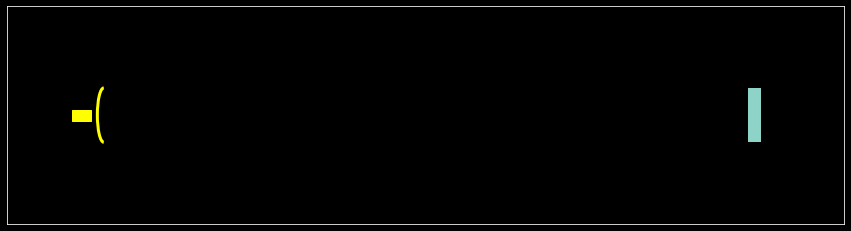

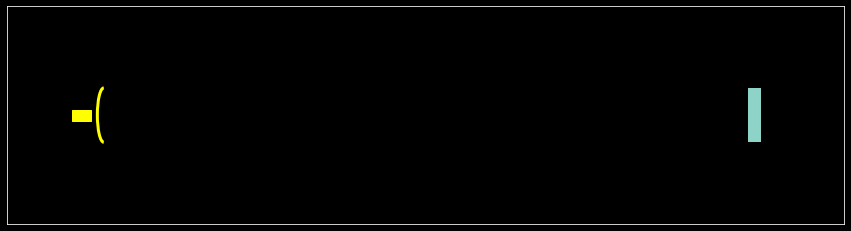

In [97]:
for i,t in enumerate(np.arange(-10,210,2)):
    x = [x for x in pulse_x(t,10,204) if x > 0]
    fig,ax = plt.subplots(figsize=(15,4))
    ax.set_xlim((-.15,1.15))
    ax.set_ylim((-2,2))
    ax.tick_params(axis='x', which='both',bottom=False, top=False, labelbottom=False)
    ax.tick_params(axis='y', which='both',left=False, right=False, labelleft=False)
    if len(x)>0:
        y = pulse_y(cycles=10)[-len(x):]
        ax.plot(x,y,'w')
    tgt = patches.Rectangle((1,-.5),.02,1)
    ant = patches.Arc((0,0),.02,1,theta1=90,theta2=270,linewidth=3,color='yellow')
    base = patches.Rectangle((-.05,-.1),.03,.2,color='yellow')
    ax.add_patch(tgt)
    ax.add_patch(ant)
    ax.add_patch(base)
    plt.style.use('dark_background')
    fig.savefig(f"radar_pulse_{i:03}.png")